In [1]:
import MetaTrader5

In [2]:
from MetaTrader5 import *
from datetime import date
import pandas as pd 
import matplotlib.pyplot as plt 

# Initializing MT5 connection 
MT5Initialize()
MT5WaitForTerminal()

print(MT5TerminalInfo())
print(MT5Version())

[2, 'MetaQuotes-Demo', '18615817']
[500, 2085, '13 Jun 2019']


In [3]:
# Create currency watchlist for which correlation matrix is to be plotted
sym = ['EURUSD','GBPUSD','USDJPY','USDCHF','AUDUSD','GBPJPY']

# Copying data to dataframe
d = pd.DataFrame()
for i in sym:
     rates = MT5CopyRatesFromPos(i, MT5_TIMEFRAME_M1, 0, 1000)
     d[i] = [y.close for y in rates]

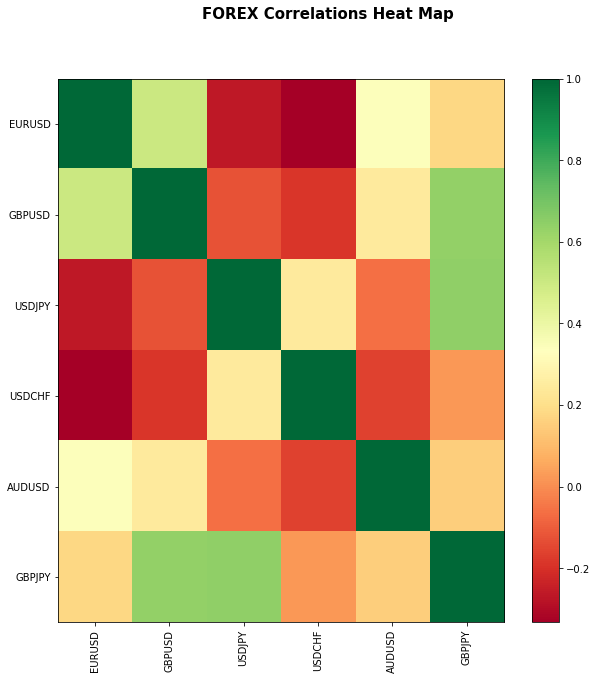

In [4]:
# Deinitializing MT5 connection
MT5Shutdown()

# Compute Percentage Change
rets = d.pct_change()

# Compute Correlation
corr = rets.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('FOREX Correlations Heat Map', fontsize=15, fontweight='bold')
plt.show()

In [5]:
# Importing statmodels for cointegration test
import statsmodels
from statsmodels.tsa.stattools import coint

x = d['GBPUSD']
y = d['GBPJPY']
x = (x-min(x))/(max(x)-min(x))
y = (y-min(y))/(max(y)-min(y))

score = coint(x, y)
print('t-statistic: ', score[0], ' p-value: ', score[1])

t-statistic:  -1.2539024059891428  p-value:  0.8432154569603427


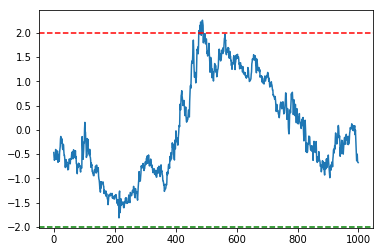

In [6]:
# Plotting z-score transformation
diff_series = (x - y)
zscore = (diff_series - diff_series.mean()) / diff_series.std()

plt.plot(zscore)
plt.axhline(2.0, color='red', linestyle='--')
plt.axhline(-2.0, color='green', linestyle='--')

plt.show()

In [8]:
from MetaTrader5 import *
from datetime import datetime
import pandas as pd
# Initializing MT5 connection 
MT5Initialize()
MT5WaitForTerminal()

print(MT5TerminalInfo())
print(MT5Version())

# Copying data to pandas data frame
stockdata = pd.DataFrame()
rates = MT5CopyRatesFromPos("EURUSD", MT5_TIMEFRAME_M1, 0, 5000)
# Deinitializing MT5 connection
MT5Shutdown()

stockdata['Open'] = [y.open for y in rates]
stockdata['Close'] = [y.close for y in rates]
stockdata['High'] = [y.high for y in rates]
stockdata['Low'] = [y.low for y in rates]
stockdata['Date'] = [y.time for y in rates]

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

trace = go.Ohlc(x=stockdata['Date'],
                open=stockdata['Open'],
                high=stockdata['High'],
                low=stockdata['Low'],
                close=stockdata['Close'])

data = [trace]
plot(data)

[2, 'MetaQuotes-Demo', '18615817']
[500, 2085, '13 Jun 2019']


'temp-plot.html'

In [9]:
from enum import Enum

In [28]:
class Architecture(Enum):
    LSTM = 0
    GRU = 1

In [40]:
Architecture.LSTM.value

0

NameError: name 'LSTM' is not defined

In [67]:
from keras.layers import CuDNNGRU, Dense, Dropout
from keras.models import Sequential

In [52]:
import numpy as np

In [59]:
X_train = np.arange(0, 3000)

In [63]:
X_train = X_train.reshape(-1,60)

In [64]:
X_train

array([[   0,    1,    2, ...,   57,   58,   59],
       [  60,   61,   62, ...,  117,  118,  119],
       [ 120,  121,  122, ...,  177,  178,  179],
       ...,
       [2820, 2821, 2822, ..., 2877, 2878, 2879],
       [2880, 2881, 2882, ..., 2937, 2938, 2939],
       [2940, 2941, 2942, ..., 2997, 2998, 2999]])

In [69]:
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(CuDNNGRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(CuDNNGRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(CuDNNGRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(CuDNNGRU(units=50))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))

In [72]:
regressorGRU.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnngru_5 (CuDNNGRU)       (None, 60, 50)            7950      
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
cu_dnngru_6 (CuDNNGRU)       (None, 60, 50)            15300     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
cu_dnngru_7 (CuDNNGRU)       (None, 60, 50)            15300     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
cu_dnngru_8 (CuDNNGRU)       (None, 50)                15300     
__________

In [1]:
s = {'a':3, 'b':4}

In [3]:
type(s) == dict

True